In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
# understanding dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.shape

(891, 12)

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
## Cleaning data

In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data = data.drop(columns=['Cabin'])
data = data.dropna(subset=['Embarked'])
# we remove cabin column 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
data.shape

(889, 11)

In [ ]:
data['Familysize'] = data['SibSp']+data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:
## Relationship Analysis

In [ ]:
#  Survival Count
data['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [ ]:
a = data.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
print(a)

Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119


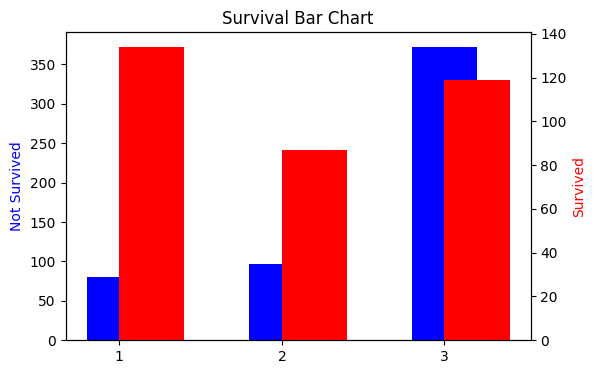

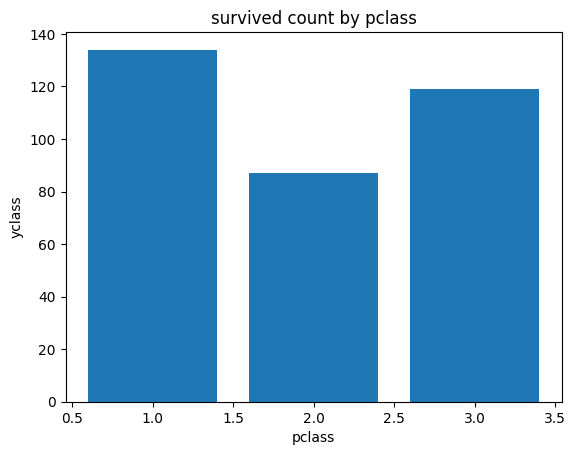

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()

ax1.bar(a.index, a[0], color='blue', width=0.4, align='center')
ax2.bar(a.index, a[1], color='red', width=0.4, align='edge')

# Axis labels
ax1.set_ylabel('Not Survived',color='blue')
ax2.set_ylabel('Survived',color='red')

ax1.set_xticks(a.index)
ax1.set_xticklabels([1, 2, 3])

plt.title("Survival Bar Chart")
plt.show()


# Survival by Passenger Class
plt.bar(a.index,a[1])
plt.xlabel('pclass')
plt.ylabel('yclass')
plt.title('survived count by pclass')
plt.savefig("survival_dual_bar_chart.png")
plt.show()

In [ ]:
# Survival by Gender
b = data.groupby(['Sex','Survived']).size().unstack(fill_value = 0 )

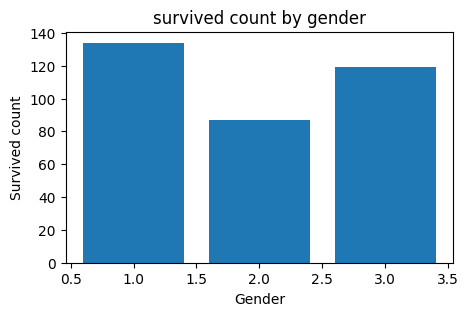

In [ ]:
plt.figure(figsize=(5, 3))
plt.bar(a.index,a[1])
plt.xlabel('Gender')
plt.ylabel('Survived count')
plt.title('survived count by gender')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

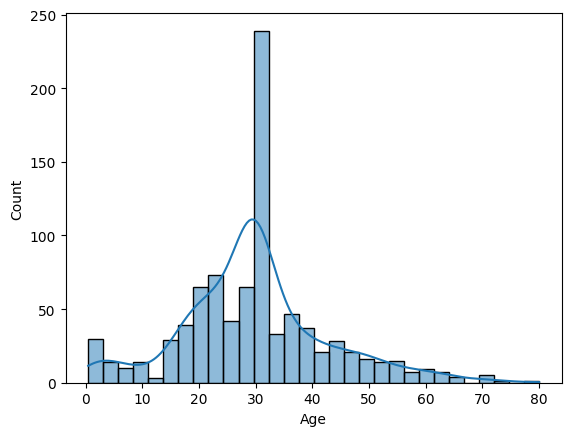

In [ ]:
# Age Distribution
import seaborn as sns
sns.histplot(data['Age'], kde=True)

<Axes: xlabel='Age', ylabel='Count'>

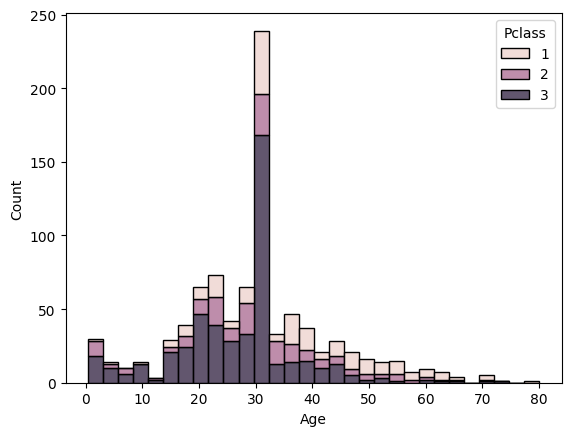

In [ ]:
## Age vs Pclass
sns.histplot(data=data, x='Age', hue='Pclass', multiple='stack')

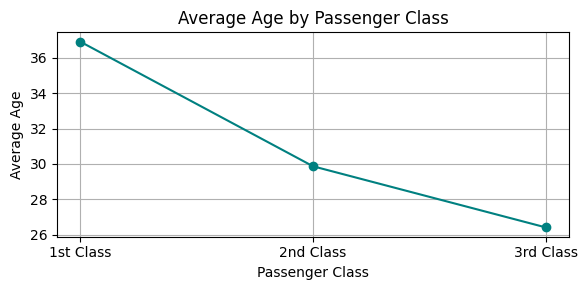

In [ ]:
import matplotlib.pyplot as plt

# Calculate average age for each class
mean_ages = data.groupby('Pclass')['Age'].mean()

# Plotting
plt.figure(figsize=(6, 3))
plt.plot(mean_ages.index, mean_ages.values, marker='o', linestyle='-', color='teal')

# Axis labels and title
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])
plt.xlabel('Passenger Class')
plt.ylabel('Average Age')
plt.title('Average Age by Passenger Class')
plt.grid(True)
plt.tight_layout()
plt.show()



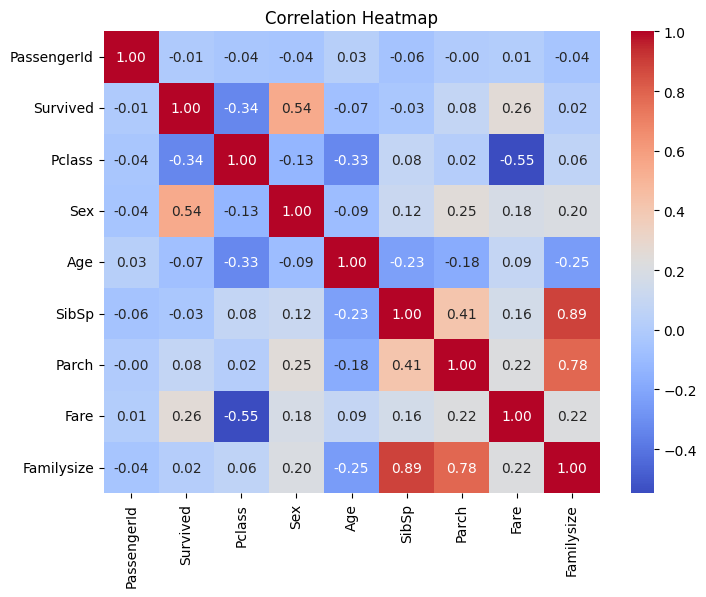

In [ ]:
new_data = data.drop(columns=['Name','Ticket','Embarked'])
new_data['Sex'] = new_data['Sex'].map({"male":0,"female":1})

plt.figure(figsize=(8, 6))
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

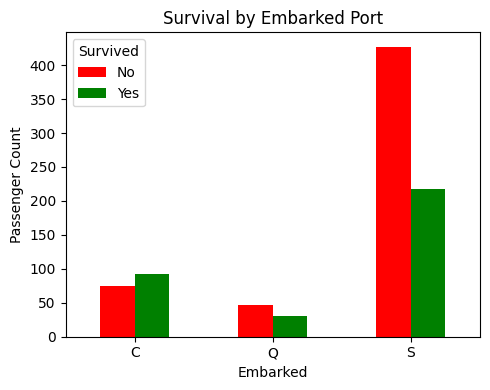

In [ ]:
import matplotlib.pyplot as plt

# Count the values grouped by Embarked and Survived
embarked_survival = data.groupby(['Embarked', 'Survived']).size().unstack()

# Plot
embarked_survival.plot(kind='bar', stacked=False, color=['red', 'green'], figsize=(5, 4))
plt.title('Survival by Embarked Port')
plt.xlabel('Embarked')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

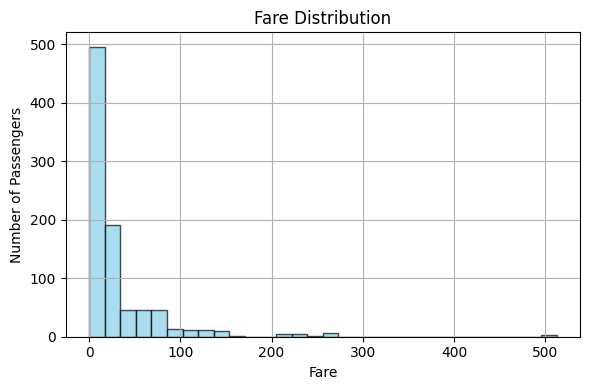

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(data['Fare'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.tight_layout()
plt.show()


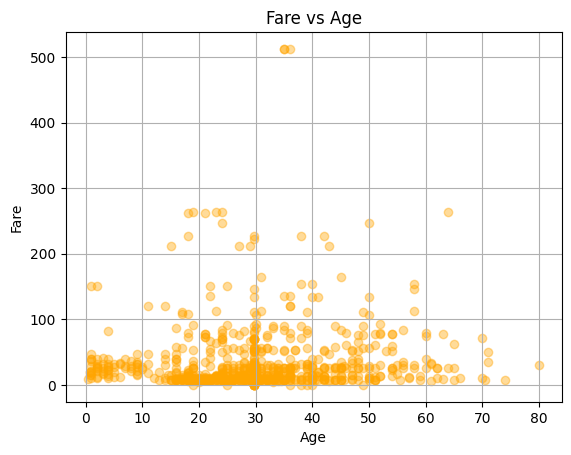

In [ ]:
# Fare vs Age
plt.scatter(data['Age'], data['Fare'],color='orange', alpha=0.4)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs Age')
plt.grid(True)
plt.show()
